<a href="https://colab.research.google.com/github/Kaedeeeeeeeeeeee/Analisis-Sentimen-Dompet-Digital/blob/main/Skripsi_Willi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import Library dan data

In [1]:
!pip install seaborn

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn==0.12.2
!pip install matplotlib==3.7.1
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


In [4]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from collections import Counter

In [5]:
!ls /content/drive/MyDrive/data/

 cleaned_dompet_digital.csv  'dompet digital.csv'   Dompet-Digital-utf8.csv   hasil_stemming.csv


In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/Dompet-Digital-utf8.csv', sep=';')

In [7]:
df

,at,userName,score,content,application
0,13/01/2025 3:23,Pengguna Google,5,Sangat membantu dalam hal transaksi keuangan,Dana
1,13/01/2025 3:23,Pengguna Google,5,Recommended,Dana
2,13/01/2025 3:21,Pengguna Google,1,saya suka heran knp saldo saya tiba berkurang ...,Dana
3,13/01/2025 3:19,Pengguna Google,5,sukses sll buat Dana semoga dngn ada nya Dana ...,Dana
4,13/01/2025 3:17,Pengguna Google,5,sangat menyukai,Dana
...,...,...,...,...,...
15157,06/11/2024 9:03,Pengguna Google,1,Ga bisa di buka pdhl udh di updt apk nya tpi t...,Ovo
15158,06/11/2024 8:56,Pengguna Google,1,"Kecewa upgrade OVO ke OVONabung, jadi gak bisa...",Ovo
15159,06/11/2024 8:24,Pengguna Google,1,top bisa buat bayar gak bisa terakhir pakai 20...,Ovo
15160,06/11/2024 7:38,Pengguna Google,5,Ko hp saya tidak bisa daftar dengan email dan ...,Ovo


# 2.Preprocessing

In [8]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    mask = (words_count >= min_words) & (words_count <= max_words)
    filtered_df = dataframe[mask]
    return filtered_df

min_words = 3
max_words = 50
df = filter_tokens_by_length(df, 'content', min_words, max_words)


In [9]:
columns_4 = df[['at','userName','score','application']]

In [10]:
columns_4

,at,userName,score,application
0,13/01/2025 3:23,Pengguna Google,5,Dana
2,13/01/2025 3:21,Pengguna Google,1,Dana
3,13/01/2025 3:19,Pengguna Google,5,Dana
6,13/01/2025 3:10,Pengguna Google,1,Dana
7,13/01/2025 3:07,Pengguna Google,4,Dana
...,...,...,...,...
15157,06/11/2024 9:03,Pengguna Google,1,Ovo
15158,06/11/2024 8:56,Pengguna Google,1,Ovo
15159,06/11/2024 8:24,Pengguna Google,1,Ovo
15160,06/11/2024 7:38,Pengguna Google,5,Ovo


In [11]:
#melakukan normalisasi
norm = {
    ' bisa2 ' : ' bisa ',
    ' apk ' : ' aplikasi ',
    ' tdk ' : ' tidak ',
    ' gk ' : ' tidak ',
    ' Tolong ' : ' tolong ',
    ' aja ' : ' saja ',
    ' sm ' : ' sama ',
    ' jg ' : ' juga ',
    ' udh ' : ' sudah ',
    ' dgn ' : ' dengan ',
    ' blm ' : ' belum ',
    ' krn ' : ' karena ',
    ' tp ' : ' tapi ',
    ' dr ' : ' dari ',
    ' org ' : ' orang ',
    ' sy ' : ' saya ',
    ' km ' : ' kamu ',
    ' pd ' : ' pada ',
    ' klo ' : ' kalau ',
    ' bgt ' : ' banget ',
    ' lg ' : ' lagi ',
    ' bkn ' : ' bukan ',
    ' mlh ' : ' malah ',
    ' trs ' : ' terus ',
    ' gini ' : ' begini ',
    ' gitu ' : ' begitu ',
    ' bnyk ' : ' banyak ',
    ' cmn ' : ' cuman ',
    ' btw ' : ' ngomong-ngomong ',
    ' pls ' : ' tolong ',
    ' kpn ' : ' kapan ',
    ' td ' : ' tadi ',
    ' bs ' : ' bisa ',
    ' ga ' : ' tidak ',
    ' ok ' : ' oke ',
    ' gw ' : ' saya ',
    ' gue ' : ' saya ',
    ' lo ' : ' kamu ',
    ' skrg ' : ' sekarang ',
    ' msh ' : ' masih ',
    ' plg ' : ' paling ',
    ' jd ' : ' jadi ',
    ' sdh ' : ' sudah ',
    ' makasi ' : ' terima kasih ',
    ' makasih ' : ' terima kasih ',
    ' trmksh ' : ' terima kasih ',
    ' thx ' : ' terima kasih ',
    ' thks ' : ' terima kasih ',
    ' dlm ' : ' dalam ',
    ' yg ' : ' yang ',
    ' mudah ' : ' mudah ',
    ' tidak ' : ' tidak ',
    ' jika ' : ' jika ',
    ' kalo ' : ' kalau ',
    ' kcwa ' : ' kecewa ',
    ' kecwa ' : ' kecewa ',
    ' mlh ' : ' malah ',
    ' ngelag ' : ' lag ',
    ' keitung ' : ' dihitung ',
    ' cashback ' : ' pengembalian uang ',
    ' diskon ' : ' potongan harga ',
    ' koin ' : ' poin ',
    ' topup ' : ' isi saldo ',
    ' saldo ' : ' uang elektronik ',
    ' lemot ' : ' lambat ',
    ' stuck ' : ' macet ',
    ' upgrade ' : ' pembaruan ',
    ' notif ' : ' notifikasi ',
    ' verif ' : ' verifikasi ',
    ' server ' : ' layanan ',
    ' cs ' : ' customer service ',
    ' trf ' : ' transfer ',
    ' byr ' : ' bayar ',
    ' bayar2 ' : ' pembayaran ',
    ' billing ' : ' tagihan ',
    ' pulsa ' : ' kredit telepon ',
    ' history ' : ' riwayat ',
    ' pending ' : ' tertunda ',
    ' approve ' : ' disetujui ',
    ' reject ' : ' ditolak ',
    ' unlimited ' : ' tidak terbatas ',
    ' exp ' : ' kedaluwarsa ',
    ' merchant ' : ' penjual ',
    ' no hp ' : ' nomor telepon ',
    ' security ' : ' keamanan ',
    ' fraud ' : ' penipuan ',
    ' login ' : ' masuk ',
    ' logout ' : ' keluar ',
    ' tagihan ' : ' billing ',
    ' bug ' : ' kesalahan sistem ',
    ' refund ' : ' pengembalian dana ',
    ' feedback ' : ' umpan balik ',
    ' upgrade akun ' : ' pembaruan akun ',
    ' paylater ' : ' bayar nanti ',
    ' limit ' : ' batas ',
    ' pin ' : ' kode keamanan ',
    ' remit ' : ' kiriman uang ',
    ' gagal ' : ' tidak berhasil ',
    ' sukses ' : ' berhasil ',
    ' tgl ' : ' tanggal ',
    ' transaksi ' : ' aktivitas keuangan ',
    ' potongan ' : ' pengurangan ',
    ' layanan ' : ' service ',
    ' hp ' : ' handphone ',
    ' resend ' : ' kirim ulang ',
    ' card ' : ' kartu ',
    ' kode ' : ' kode ',
    ' virtual account ' : ' rekening virtual ',
    ' sll ' : ' selalu ',
    ' knp ' : ' kenapa ',
    ' daptar ' : ' daftar ',
    ' sgt ' : ' sangat ',
    ' buat ' : ' untuk ',
    ' Buat ' : ' untuk ',
    ' sangat ' : ' sangat ',
    ' Sangat ' : ' sangat ',
    ' amplikasi ' : ' aplikasi ',
    ' aja ' : ' aja ',
    ' saja ' : ' saja ',

}


def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

<ipython-input-11-dc910a945b6c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: normalisasi(x))


In [12]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [13]:
# Stopwords

import Sastrawi
from Sastrawi. StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

excluded_words = ['sangat', 'Sangat']
more_stop_words.extend(excluded_words)
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)

stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))
df.sample(5)

<ipython-input-13-e177536b6595>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: stopword(x))


,at,userName,score,content,application
7535,04/01/2025 5:46,Pengguna Google,3,kasih 3 aja dulu soalnya ngajuin pinjaman dit...,Gopay
12232,12/12/2024 10:29,Pengguna Google,5,capet mantap,Ovo
10440,07/01/2025 17:41,sonia nurlaila,5,Beri layman baik,Ovo
3498,07/01/2025 13:01,Aisyah,5,Aktifkan dana cicil,Dana
14054,17/11/2024 18:12,Pengguna Google,1,saldo terpotong dana belom masuk,Ovo


In [14]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Ambil stopwords bawaan
factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# Pastikan "sangat" tidak ada dalam daftar stopwords
stop_words.discard("sangat")

# Fungsi untuk menghapus stopwords, menjaga kata 'sangat'
def remove_stopwords(text):
    if not isinstance(text, str):
        return text  # Pastikan hanya string yang diproses

    # Debug sebelum proses
    print(f"SEBELUM: {text}")

    # Gunakan regex untuk menjaga kata 'sangat' dan mencegah pemotongan yang tidak diinginkan
    text = re.sub(r'\b(sangat)\b', r'<<<SANGAT>>>', text)  # Menyimpan 'sangat'

    # Pisahkan teks menjadi kata-kata
    words = text.split()

    # Hapus stopwords lainnya
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Gabungkan kembali kata-kata yang tersisa
    result = " ".join(filtered_words)

    # Kembalikan 'sangat' yang sudah diganti kembali ke bentuk semula
    result = result.replace("<<<SANGAT>>>", "sangat")

    # Debug setelah proses
    print(f"SESUDAH: {result}")

    return result

# Terapkan ke kolom 'content'
df['content'] = df['content'].astype(str).apply(remove_stopwords)

# Cek hasilnya
df.sample(5)



Output streaming akan dipotong hingga 5000 baris terakhir.
SEBELUM: Apaan daftar email selalu gagal
SESUDAH: Apaan daftar email selalu gagal
SEBELUM: Oalah banyak biaya admin gak kaya aplikasi lain. Nyesel gunain padahal cuma transfer doang di pilihan disediain adanya cuma aplikasi
SESUDAH: Oalah banyak biaya admin gak kaya aplikasi lain. Nyesel gunain padahal cuma transfer doang pilihan disediain adanya cuma aplikasi
SEBELUM: Gratis apanya transfer,masih aja dikenakan biaya 2500 payah
SESUDAH: Gratis apanya transfer,masih aja dikenakan biaya 2500 payah
SEBELUM: aplikasi paling jelek,jgan pernah pake aplikasi ini. duit ilang ovo
SESUDAH: aplikasi paling jelek,jgan pernah pake aplikasi ini. duit ilang ovo
SEBELUM: AKUN SAYA DI RETAS ORANG YANG TIDAK BERTANGGUNG JAWAB,DAN PIHAK OVO TIDAK MERESPON SAMA SEKALI
SESUDAH: AKUN RETAS ORANG BERTANGGUNG JAWAB,DAN PIHAK OVO MERESPON SAMA SEKALI
SEBELUM: min bisa nyambungin ovo tokopedia, ngirim kodenya sih
SESUDAH: min nyambungin ovo tokopedia, n

<ipython-input-14-788ef0384f5f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].astype(str).apply(remove_stopwords)


,at,userName,score,content,application
4371,06/01/2025 9:40,Pengguna Google,5,Saling2 lah berbaik,Dana
803,11/01/2025 17:57,Agung 0907,1,"pernah ngalamin ga, melakukan apa tiba2 uang e...",Dana
1531,10/01/2025 14:35,Pengguna Google,5,Terimakasih banyak DANA lama menggunakannya be...,Dana
11446,23/12/2024 2:13,yusuf kentarra,1,Buruk...sangat mengecewakan g mau pake ovo lg....,Ovo
1513,10/01/2025 15:06,Pengguna Google,5,very good ?,Dana


In [15]:
print("stop_words:", stop_words)
print("excluded_words:", excluded_words)

stop_words: {'anda', 'itu', 'dan', 'supaya', 'yang', 'tidak', 'ia', 'lain', 'tentang', 'ya', 'sesudah', 'belum', 'tentu', 'menurut', 'jika', 'tetapi', 'kemana', 'kah', 'kepada', 'sesuatu', 'guna', 'ini', 'atau', 'pula', 'seperti', 'setidaknya', 'serta', 'seolah', 'dia', 'itulah', 'saja', 'demi', 'sekitar', 'terhadap', 'selagi', 'sebab', 'pasti', 'selain', 'harus', 'oleh', 'kita', 'setelah', 'bagi', 'hanya', 'nggak', 'oh', 'sebelum', 'ingin', 'seraya', 'dua', 'bahwa', 'dimana', 'yaitu', 'ke', 'dulunya', 'seterusnya', 'masih', 'anu', 'dsb', 'sedangkan', 'juga', 'sebetulnya', 'pada', 'hal', 'secara', 'dahulu', 'agak', 'lagi', 'yakni', 'kembali', 'untuk', 'mereka', 'sampai', 'mari', 'melainkan', 'dapat', 'tapi', 'tanpa', 'antara', 'dll', 'apalagi', 'seharusnya', 'daripada', 'para', 'sebagai', 'ada', 'begitu', 'bisa', 'pun', 'walau', 'saat', 'dst', 'saya', 'karena', 'namun', 'kenapa', 'boleh', 'ok', 'ketika', 'akan', 'kecuali', 'bagaimanapun', 'agar', 'setiap', 'nanti', 'demikian', 'maka', 

In [16]:
#tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

,content
0,"[membantu, aktivitas, keuangan, keuangan]"
2,"[suka, heran, uang, elektronik, tiba, berkuran..."
3,"[sukses, selalu, Dana, semoga, dngn, nya, Dana..."
6,"[cs, terlalu, sibuk, jadi, lama, proses, nya]"
7,"[mudah, cepat]"
...,...
15157,"[Ga, buka, pdhl, updt, aplikasi, nya, tpi, ttp..."
15158,"[Kecewa, pembaruan, OVO, OVONabung,, jadi, gak..."
15159,"[top, bayar, gak, terakhir, pakai, 2021, bukan..."
15160,"[Ko, handphone, daftar, email, no, hp]"


In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
# df.to_csv('hasil_stemming.csv', index=False)

Output streaming akan dipotong hingga 5000 baris terakhir.
apk anjing gopay pinjam udah tunnggu bulan ngajuain acc bangsat ngremeim gua lu anjing gua pake gopay uda 5tahun an anjing apk anjing hapus data gopay gua gua mau hapus aplikasi gopay anjing
bantu sekali
mantap pokoknyaa pakai gopay
alhamdulillah sekarang gopay udah mudah lancar jaya teransaksi ful bintang terimakasih
suka bgt mau apus akun ambil pinjam an
pakai gopay lebih ekonomis
tetap jadi baik paling baik
bagus midah banget belanja apa topup game
bgus ringan simpel mntap pkonya aplgi kalau fitur gopay pinjam mudah pake the best kya y
buruk  aju gopay pinjamn paylater selalu tolak
ose ad bkin ap syg banget allah 3
pakai gopay laternya gak tunggu bulan bulan kalau bayar gapernah telat sama sekali padahal
iklan gopay pantex
transfer dana uang elektronik potong dana masuk
aplikasi is the best 
ga nyesel langgan gopay spiker enihhh makin bantu
tingkat promo lebih murah jangkau masyarakat indonesia mantap selalu gopay jaya selal

In [18]:
df = pd.concat([tokenized, columns_4 ], axis=1)
df

,content,at,userName,score,application
0,bantu aktivitas uang uang,13/01/2025 3:23,Pengguna Google,5,Dana
2,suka heran uang elektronik tiba kurang sendiri...,13/01/2025 3:21,Pengguna Google,1,Dana
3,sukses selalu dana moga dngn nya dana mudah al...,13/01/2025 3:19,Pengguna Google,5,Dana
6,cs terlalu sibuk jadi lama proses nya,13/01/2025 3:10,Pengguna Google,1,Dana
7,mudah cepat,13/01/2025 3:07,Pengguna Google,4,Dana
...,...,...,...,...,...
15157,ga buka pdhl updt aplikasi nya tpi ttp suruh b...,06/11/2024 9:03,Pengguna Google,1,Ovo
15158,kecewa baru ovo ovonabung jadi gak bayar googl...,06/11/2024 8:56,Pengguna Google,1,Ovo
15159,top bayar gak akhir pakai 2021 bukan agustus m...,06/11/2024 8:24,Pengguna Google,1,Ovo
15160,ko handphone daftar email no hp,06/11/2024 7:38,Pengguna Google,5,Ovo


# 3.Labeling

In [19]:
def label_sentimen(score):
  if score <= 2:
    return 'negatif'
  elif score == 3:
    return 'netral'
  else:
    return 'positif'

df['sentimen'] = df['score'].apply(label_sentimen)
df

,content,at,userName,score,application,sentimen
0,bantu aktivitas uang uang,13/01/2025 3:23,Pengguna Google,5,Dana,positif
2,suka heran uang elektronik tiba kurang sendiri...,13/01/2025 3:21,Pengguna Google,1,Dana,negatif
3,sukses selalu dana moga dngn nya dana mudah al...,13/01/2025 3:19,Pengguna Google,5,Dana,positif
6,cs terlalu sibuk jadi lama proses nya,13/01/2025 3:10,Pengguna Google,1,Dana,negatif
7,mudah cepat,13/01/2025 3:07,Pengguna Google,4,Dana,positif
...,...,...,...,...,...,...
15157,ga buka pdhl updt aplikasi nya tpi ttp suruh b...,06/11/2024 9:03,Pengguna Google,1,Ovo,negatif
15158,kecewa baru ovo ovonabung jadi gak bayar googl...,06/11/2024 8:56,Pengguna Google,1,Ovo,negatif
15159,top bayar gak akhir pakai 2021 bukan agustus m...,06/11/2024 8:24,Pengguna Google,1,Ovo,negatif
15160,ko handphone daftar email no hp,06/11/2024 7:38,Pengguna Google,5,Ovo,positif


In [20]:
df_counts = df.sentimen.value_counts()
df_counts

,count
sentimen,
negatif,5540
positif,5316
netral,656


# 4.Visualization

<ipython-input-21-bbc772b5dc5b>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['at'] = pd.to_datetime(df['at'])


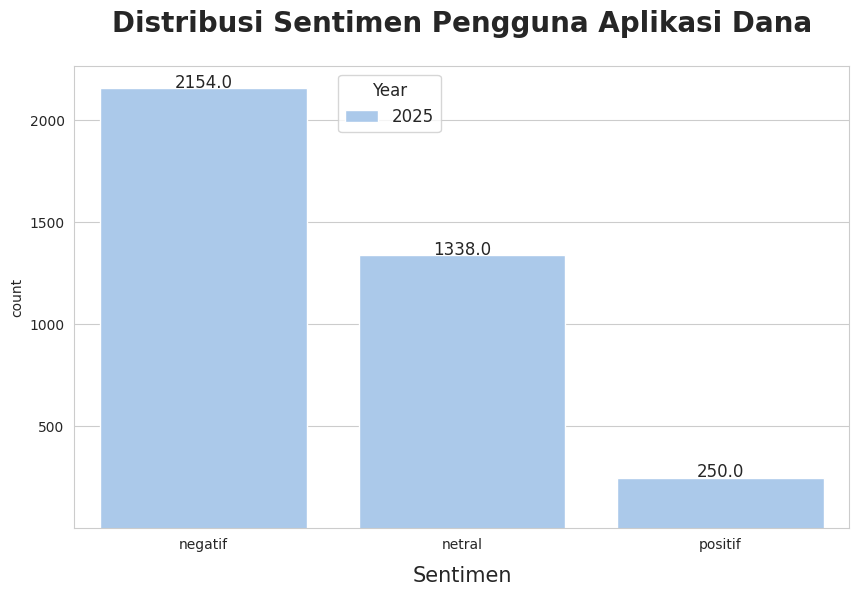

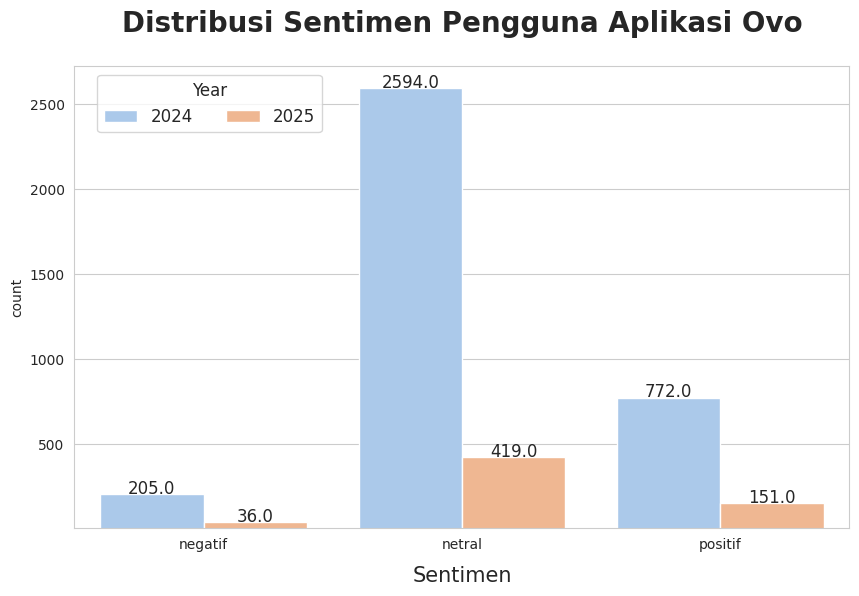

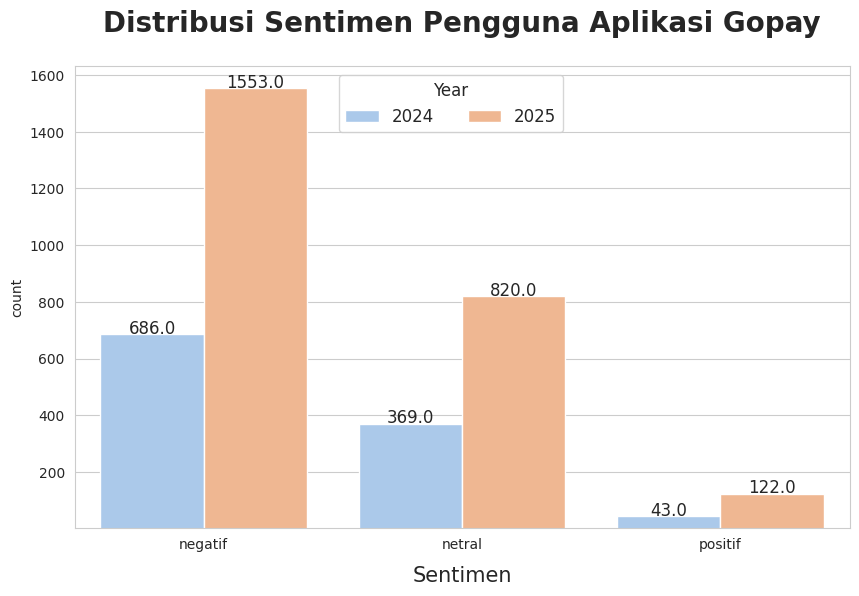

In [21]:
df['at'] = pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year
applications = ['Dana', 'Ovo', 'Gopay']

for app in applications:
  df_app = df[df['application'] == app]
  position = range (len (df_app['sentimen'].unique()))
  labels = sorted (df_app['sentimen'].unique())


  ax = sns.set_style('whitegrid')
  plt.figure(figsize=(10, 6))
  ax = sns.countplot(x="sentimen", hue="year", data=df_app, palette="pastel")

  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 3.25, rect.get_height(),
            horizontalalignment='center', fontsize=12)



  plt.legend (fontsize=12, bbox_to_anchor=(0.33, 1), ncol=3, title="Year", title_fontsize=12)
  plt.title(f'Distribusi Sentimen Pengguna Aplikasi {app}', fontsize=20, fontweight='bold', pad=25)
  plt.xlabel('Sentimen', fontsize=15, labelpad=10)
  plt.xticks(position, labels)
  plt.ylim(1)
  plt.show()

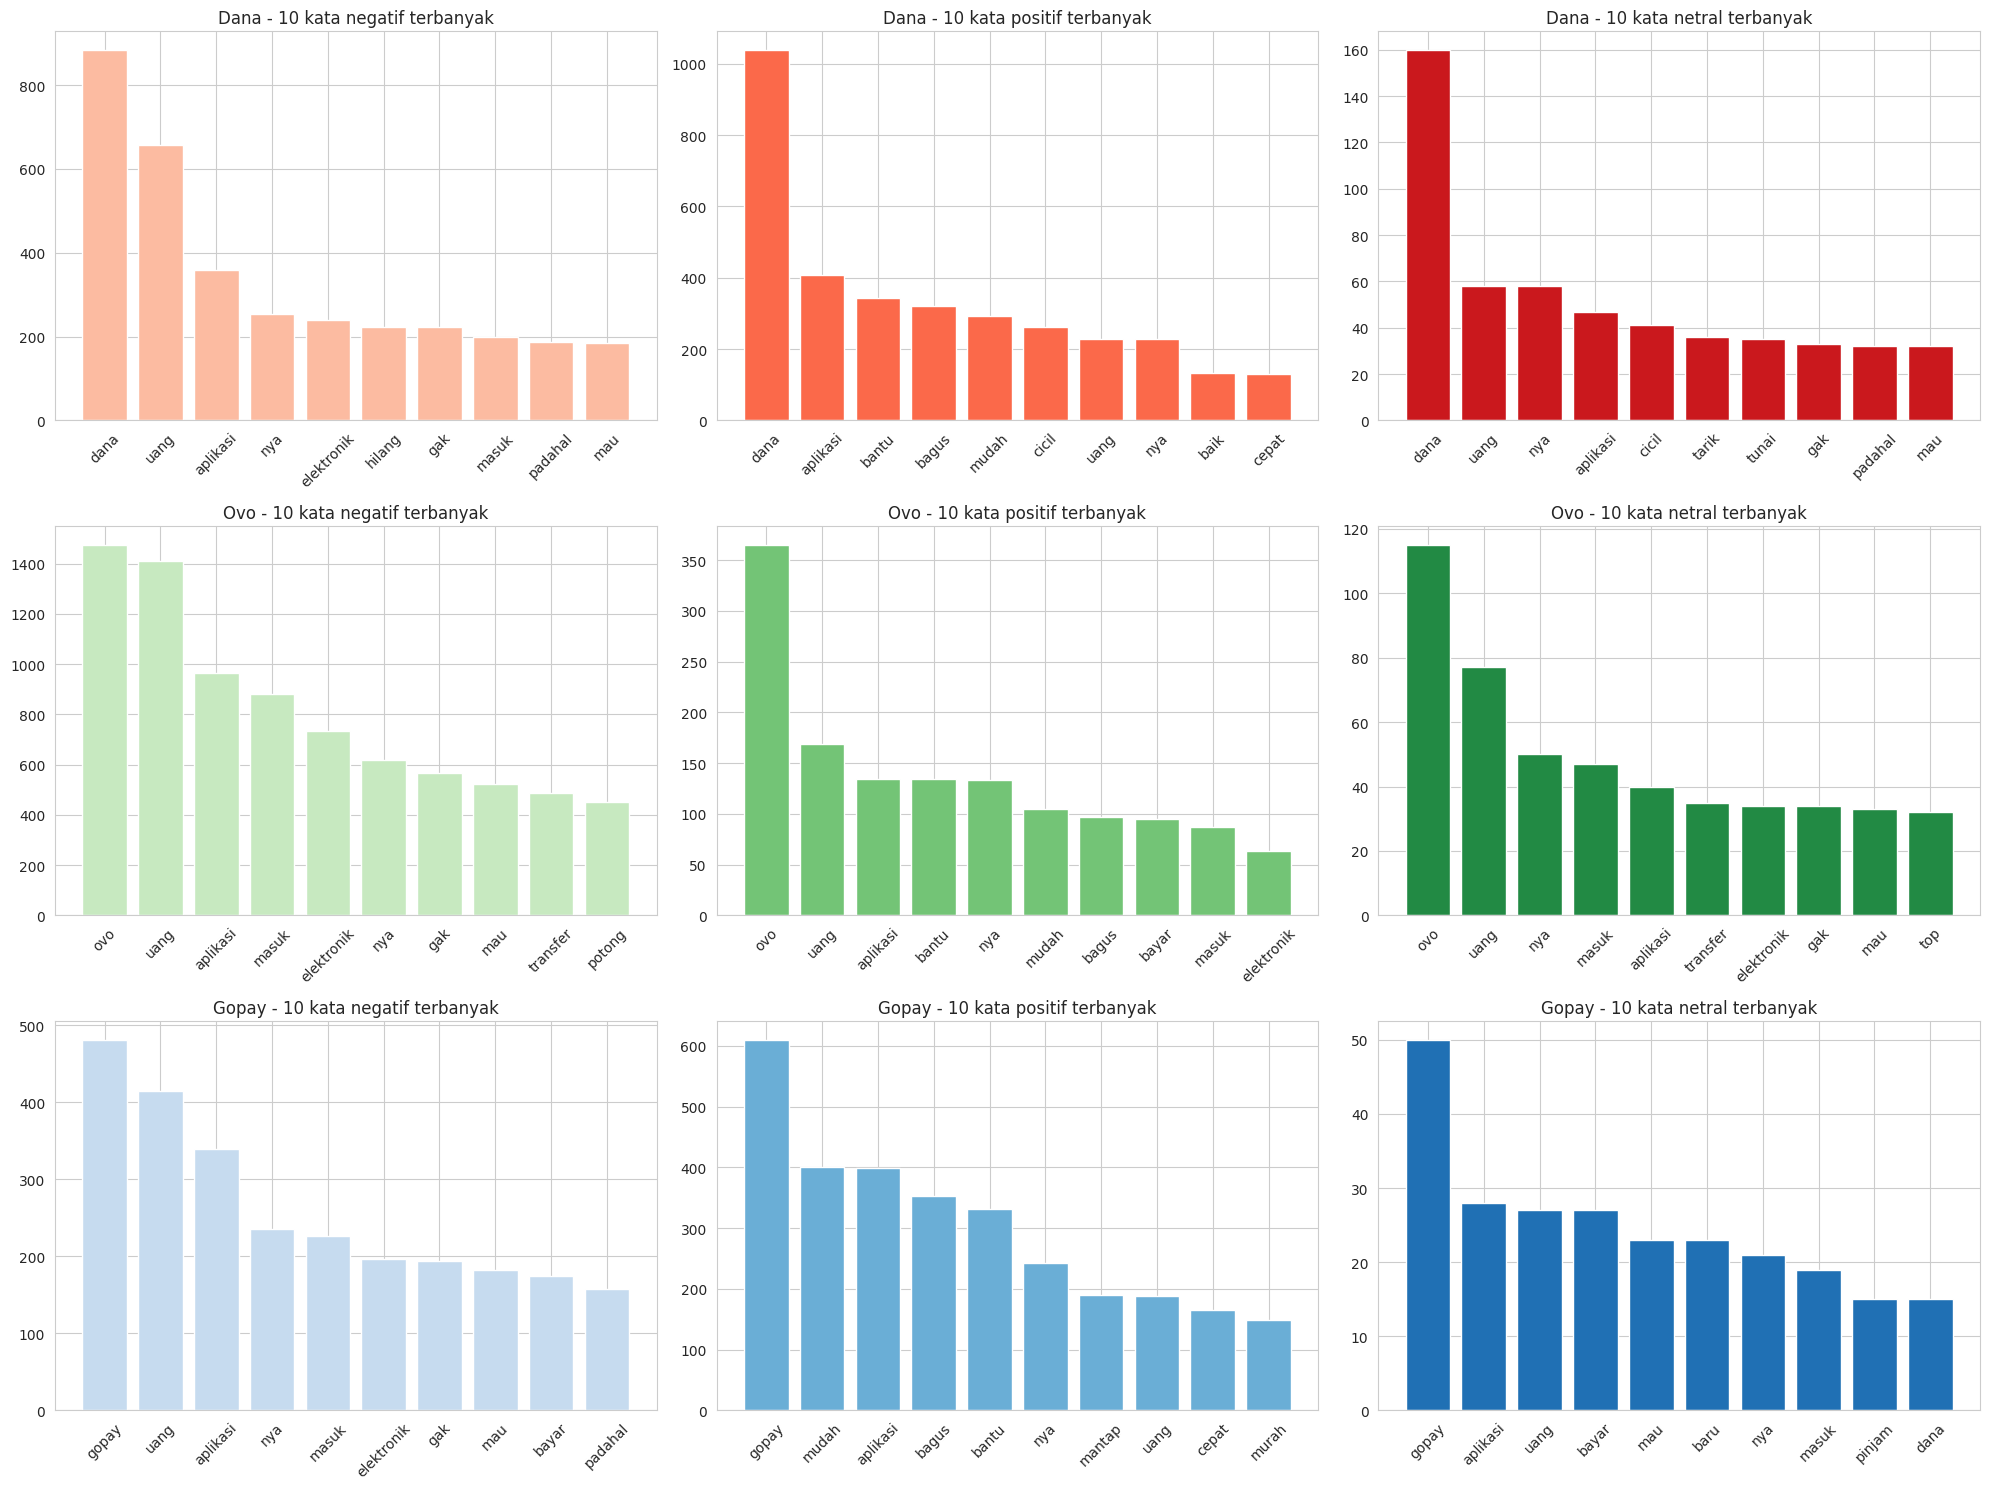

In [22]:
def hitung_kata_terbanyak (df, aplikasi, sentimen):
  komentar = df[(df['application'] == aplikasi) & (df['sentimen'] == sentimen)]['content']
  kata_counter = Counter()
  komentar.apply(lambda x: kata_counter.update(x.split()))
  return pd.DataFrame (kata_counter.most_common (10), columns=['Kata', 'Frekuensi'])

def visualisasi_kata(top_kata_df, judul, warna, posisi):
  plt.subplot(3, 3, posisi)
  plt.bar(top_kata_df['Kata'], top_kata_df['Frekuensi'], color=warna)
  plt.title(judul)
  plt.xticks(rotation=45)

aplikasi_list = ['Dana', 'Ovo', 'Gopay']
sentimen_list = ['negatif', 'positif', 'netral']

palette = {

  'Dana': sns.color_palette("Reds", 3),
  'Ovo' : sns.color_palette("Greens", 3),
  'Gopay': sns.color_palette("Blues", 3)
}

plt.figure(figsize=(20, 15))

posisi = 1
for aplikasi in aplikasi_list:
  for idx, sentimen in enumerate (sentimen_list):
      top_kata_df = hitung_kata_terbanyak (df, aplikasi, sentimen)
      warna = palette [aplikasi][idx]
      judul = f'{aplikasi} - 10 kata {sentimen} terbanyak'
      visualisasi_kata(top_kata_df, judul, warna, posisi)
      posisi += 1

plt.tight_layout()
plt.show()

# 5. prepare dan data training.


In [23]:
df_Dana = df[df['application'] == 'Dana']
df_Ovo = df[df['application'] == 'Ovo']
df_Gopay = df[df['application'] == 'Gopay']

In [24]:
x_Dana = df_Dana['content']
y_Dana = df_Dana['sentimen']

x_Ovo = df_Ovo['content']
y_Ovo = df_Ovo['sentimen']

x_Gopay = df_Gopay['content']
y_Gopay = df_Gopay['sentimen']


In [25]:
data = {
    'Dana': (x_Dana, y_Dana),
    'Ovo': (x_Ovo, y_Ovo),
    'Gopay': (x_Gopay, y_Gopay)
}

# 6.Training data

In [26]:
results = []

for app, (x, y) in data.items():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

    vectorizer = CountVectorizer()
    x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
    x_test_vectorized = vectorizer.transform(x_test).toarray()

    classifiers = {
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'RandomForest': RandomForestClassifier(),
        'NaiveBayes': MultinomialNB(),
        'SVM': SVC(kernel='linear')
    }

    for clf_name, clf in classifiers.items():
        clf.fit(x_train_vectorized, y_train)
        y_pred = clf.predict(x_test_vectorized)

        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Application': app,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f1
        })

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7.Comparative Evaluation

In [31]:
df_results = pd.DataFrame(results)
df_results

,Application,Classifier,Accuracy,Recall,Precision,F1 Score
0,Dana,KNN,0.660142,0.660142,0.625522,0.609455
1,Dana,RandomForest,0.758007,0.758007,0.720018,0.738134
2,Dana,NaiveBayes,0.798932,0.798932,0.753245,0.775329
3,Dana,SVM,0.759786,0.759786,0.732743,0.744214
4,Ovo,KNN,0.677831,0.677831,0.686506,0.672100
5,Ovo,RandomForest,0.803828,0.803828,0.744777,0.766246
6,Ovo,NaiveBayes,0.794258,0.794258,0.812779,0.750345
7,Ovo,SVM,0.755981,0.755981,0.720496,0.736643
8,Gopay,KNN,0.703154,0.703154,0.702474,0.668796
9,Gopay,RandomForest,0.840445,0.840445,0.803947,0.821377


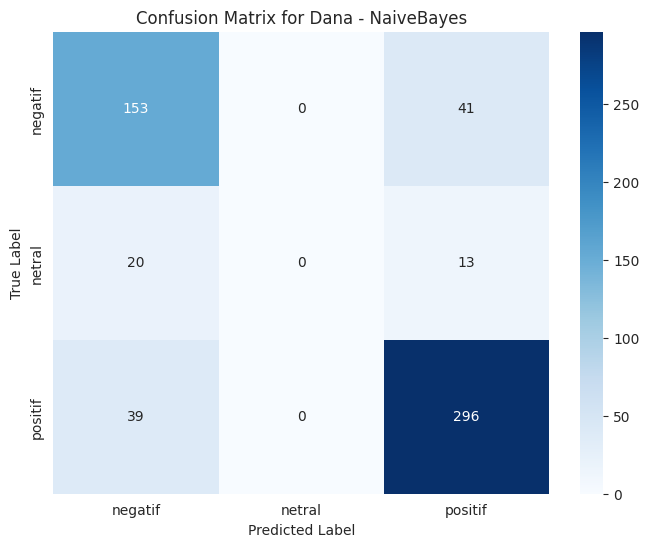

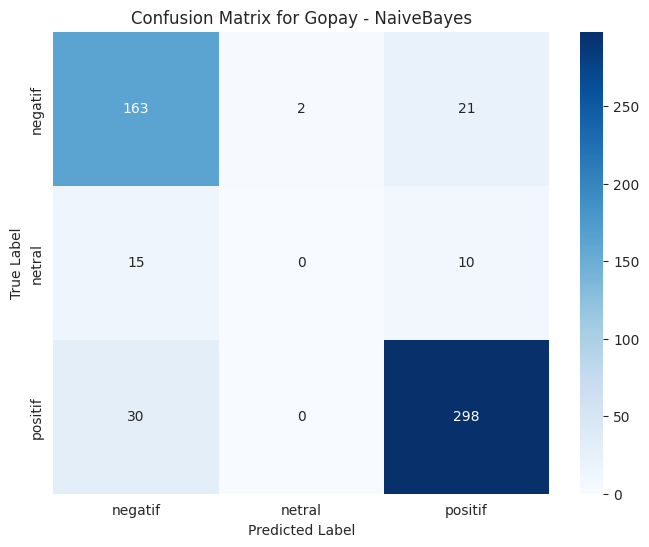

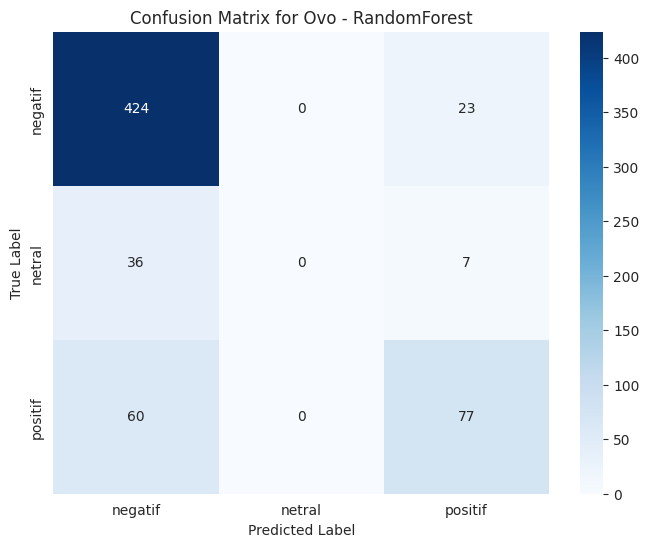

In [30]:
best_classifiers = df_results.loc[df_results.groupby('Application')['Accuracy'].idxmax()]
for index, row in best_classifiers.iterrows():
    app = row['Application']
    clf_name = row['Classifier']
    x_train, x_test, y_train, y_test = train_test_split(data[app][0], data[app][1], test_size=0.15, random_state=42)
    vectorizer = CountVectorizer()
    x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
    x_test_vectorized = vectorizer.transform(x_test).toarray()

    clf = classifiers[clf_name]
    clf.fit(x_train_vectorized, y_train)
    y_pred = clf.predict(x_test_vectorized)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np. unique (y_train), yticklabels=np.unique (y_train))
    plt.title(f'Confusion Matrix for {app} - {clf_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

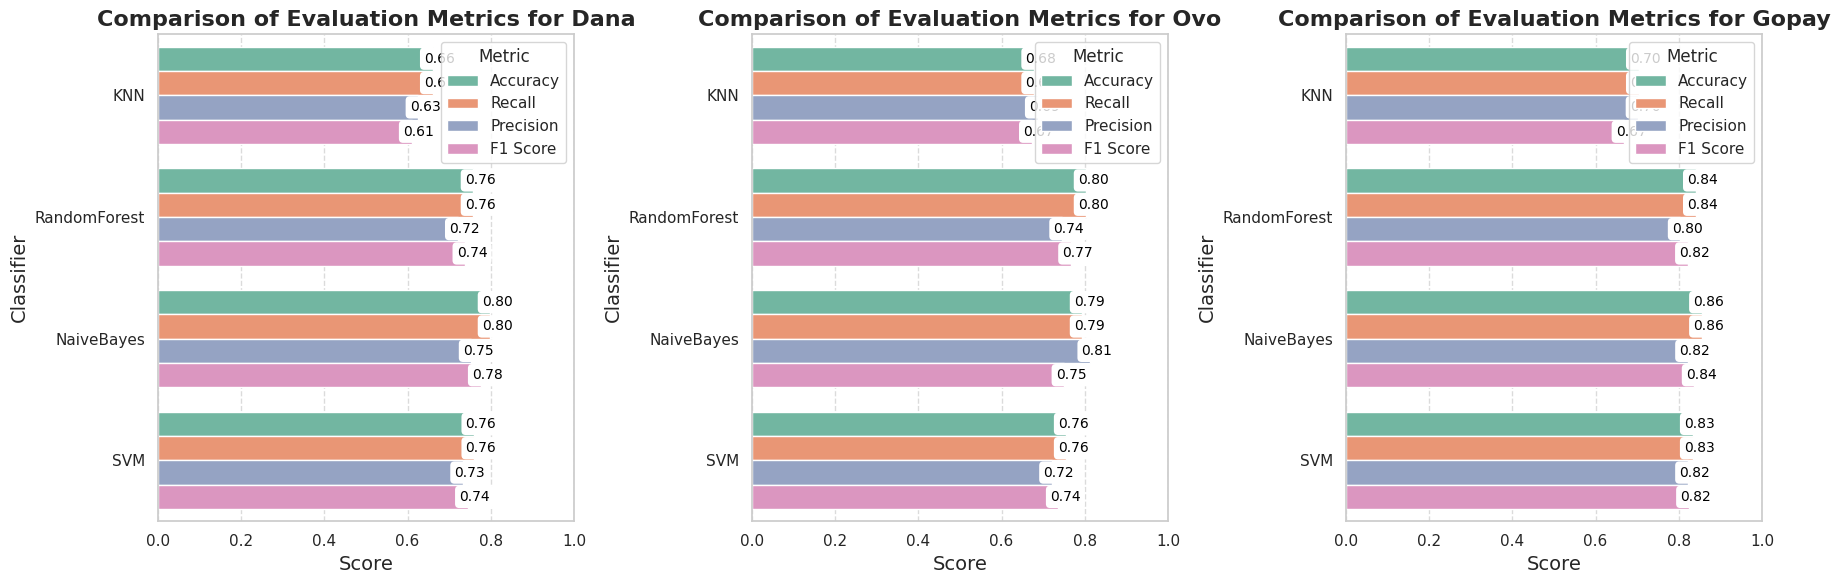

In [33]:
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

applications = df_results['Application'].unique()

for ax, app in zip(axes, applications):
    app_results = df_results[df_results['Application'] == app]

    app_results_melted = app_results.melt(id_vars=["Application", "Classifier"],
                                          value_vars=["Accuracy", "Recall", "Precision", "F1 Score"],
                                          var_name="Metric", value_name="Score")

    sns.barplot(data=app_results_melted, x='Score', y='Classifier', hue='Metric', ax=ax, errorbar=None, palette=palette)

    ax.set_title(f'Comparison of Evaluation Metrics for {app}', fontsize=16, weight='bold')
    ax.set_xlabel('Score', fontsize=14)
    ax.set_ylabel('Classifier', fontsize=14)
    ax.set_xlim(0, 1)
    ax.tick_params(axis='y', rotation=0)
    ax.xaxis.grid(True, linestyle='--', alpha=0.7)

    for p in ax.patches:
        score = p.get_width()
        ax.annotate(f'{score:.2f}',
                    (score, p.get_y() + p.get_height()/2),
                    ha='center', va='center',
                    color='black', fontsize=10,
                    xytext=(5, 0),
                    textcoords="offset points",
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()
